In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Harvesting\Data-processed\crop_recommendation.csv')


In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,60,39,40,20.879744,82.002744,6.502985,202.935536,rice
1,70,59,37,21.770462,80.319644,7.038096,226.655537,rice
2,83,50,39,23.004459,82.320763,7.840207,263.964248,rice
3,75,45,36,26.491096,80.158363,6.980401,242.864034,rice
4,98,46,45,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,119,26,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,84,18,25,27.417112,56.636362,6.086922,127.924610,coffee
2197,111,28,27,24.131797,67.225123,6.362608,173.322839,coffee
2198,120,15,33,26.272418,52.127394,6.758793,127.175293,coffee
2199,99,21,26,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

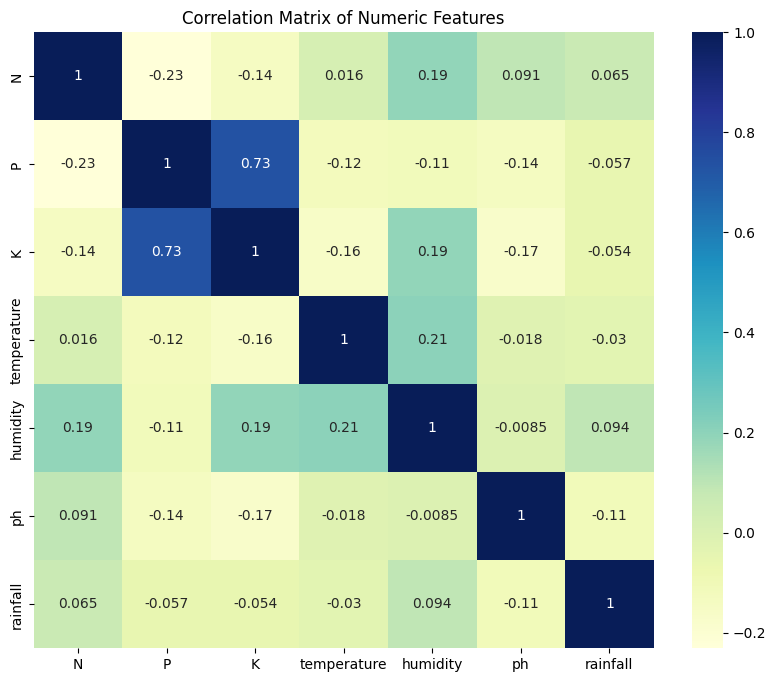

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (e.g., 'label', 'Crop', etc.)
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Seperating features and target label

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.13636363636364
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.83      0.95      0.89        21
       mango       1.00      0.88      0.94        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([0.93409091, 0.90909091, 0.91590909, 0.91363636, 0.875     ])

### Saving trained Decision Tree model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.98863636, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.975     , 0.97727273, 0.98863636, 0.97272727, 0.97727273])

In [25]:
#Saving trained SVM model

In [26]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.87      0.81      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      0.95      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.79      0.80        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      0.96      0.94        23
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.89      0.89      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94772727, 0.95227273, 0.96818182, 0.94772727, 0.95      ])

### Saving trained Logistic Regression model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99545455, 0.98636364, 0.99318182])

### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost as xgb

# Encode string labels into integers
le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.transform(Ytest)

# Train the XGBoost classifier
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Avoid warning
XB.fit(Xtrain, Ytrain_encoded)

# Predict on the test set
predicted_values = XB.predict(Xtest)

# Accuracy score
x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("✅ XGBoost's Accuracy is:", x)

# Classification report
print("🔍 Classification Report:")
print(classification_report(Ytest_encoded, predicted_values, target_names=le.classes_))


✅ XGBoost's Accuracy is: 0.9863636363636363
🔍 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      0.96      0.96        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange

In [34]:
from sklearn.model_selection import cross_val_score

# Encode the full target variable for cross-validation (same encoder!)
target_encoded = le.transform(target)

# Perform 5-fold cross-validation using the same classifier
score = cross_val_score(XB, features, target_encoded, cv=5)

# Display individual fold scores and mean accuracy
print("✅ XGBoost Cross-Validation Scores:", score)
print("🎯 Mean CV Accuracy:", score.mean())


✅ XGBoost Cross-Validation Scores: [0.98863636 0.98636364 0.99545455 0.98636364 0.98636364]
🎯 Mean CV Accuracy: 0.9886363636363636


### Saving trained XGBoost model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

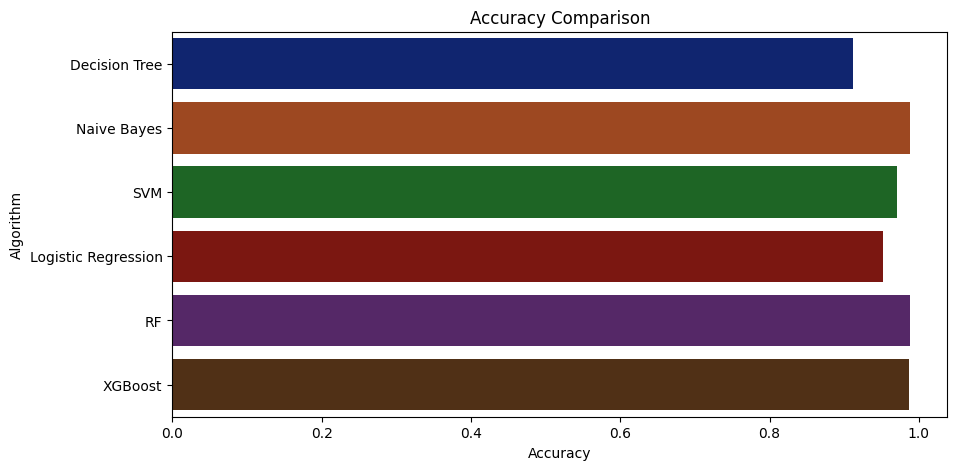

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

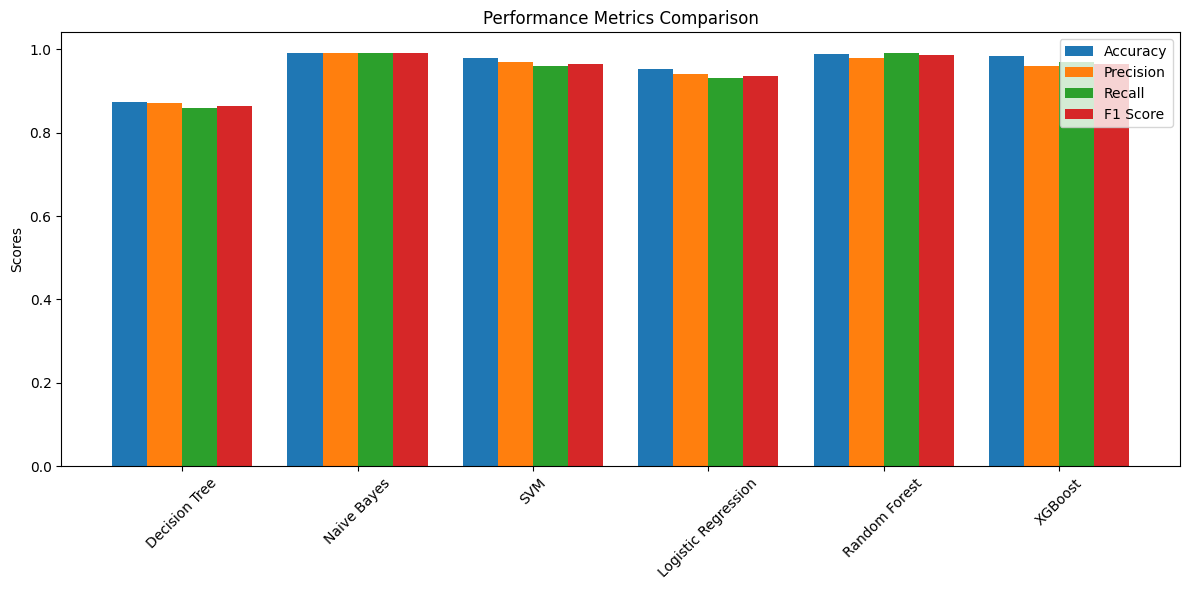

In [37]:
import numpy as np

models = ['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.8727, 0.9909, 0.9795, 0.9522, 0.9886, 0.9840]
precision = [0.87, 0.99, 0.97, 0.94, 0.98, 0.96]
recall = [0.86, 0.99, 0.96, 0.93, 0.99, 0.97]
f1 = [0.865, 0.99, 0.965, 0.935, 0.985, 0.965]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, precision, width, label='Precision')
plt.bar(x + width, recall, width, label='Recall')
plt.bar(x + 2*width, f1, width, label='F1 Score')

plt.xticks(ticks=x + width/2, labels=models, rotation=45)
plt.title('Performance Metrics Comparison')
plt.ylabel('Scores')
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9113636363636364
Naive Bayes --> 0.9886363636363636
SVM --> 0.9704545454545455
Logistic Regression --> 0.9522727272727273
RF --> 0.9886363636363636
XGBoost --> 0.9863636363636363


## Making a prediction

In [42]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [41]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
